### Lesson 8 Assignment - Wine Classifier
### Lawrence Huang

##### Instructions
1. Use the provided RedWhiteWine.csv file. Include ALL the features with “Class” being your output vector
2. Use the provided Simple Perceptron Neural Network notebook to develop a multi-layer feed-forward/backpropagation neural network
3. Be able to adjust the following between experiments:
<ul>
    <li>Learning Rate</li>
    <li>Number of epochs</li>
    <li>Depth of architecture—number of hidden layers between the input and output layers</li>
    <li>Number of nodes in a hidden layer—width of the hidden layers</li>
    <li>(optional) Momentum</li>
    </ul>
4. Determine what the best neural network structure and hyperparameter settings results in the best predictive capability

In [1]:
# imports
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import confusion_matrix, classification_report

##### 1. Use the provided RedWhiteWine.csv file. Include ALL the features with “Class” being your output vector

In [2]:
# load data
fn = 'https://library.startlearninglabs.uw.edu/DATASCI420/2019/Datasets/RedWhiteWine.csv'
df = pd.read_csv(fn)
# view data
print(df.shape)
df.head()

(6497, 13)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Class
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


In [3]:
# no missing data per data source
# all features are numeric
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
Class                     int64
dtype: object

In [4]:
# distribution of Class
print('Distribution of Class:\n{}'.format(df['Class'].value_counts()))

Distribution of Class:
0    4898
1    1599
Name: Class, dtype: int64


In [5]:
# train/test split
# stratify to ensure minority class representation in both sets
y = df['Class'] # label
X = df.loc[:, ~df.columns.isin(['Class'])] # features, start with all but the target
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=1)
print('features:\n{}'.format(X.columns.values))

# standardize numeric columns (z-score)
scaler = StandardScaler().fit(X_train)
X_train = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

features:
['fixed acidity' 'volatile acidity' 'citric acid' 'residual sugar'
 'chlorides' 'free sulfur dioxide' 'total sulfur dioxide' 'density' 'pH'
 'sulphates' 'alcohol' 'quality']


##### 2. Use the provided Simple Perceptron Neural Network notebook to develop a multi-layer feed-forward/backpropagation neural network
##### 3. Be able to adjust the following between experiments:
<ul>
    <li>Learning Rate</li>
    <li>Number of epochs</li>
    <li>Depth of architecture—number of hidden layers between the input and output layers</li>
    <li>Number of nodes in a hidden layer—width of the hidden layers</li>
    <li>(optional) Momentum</li>
    </ul>

Referenced the code by iamtrask: http://iamtrask.github.io/2015/07/27/python-network-part2/. I found the model architecture  more intuitive to adjust and experiment with than the simple perceptron notebook.

In [6]:
# sigmoid activation function
def sigmoid(x):
    output = 1/(1+np.exp(-x))
    return output

# convert output of sigmoid function to its derivative for backprop
def sigmoid_output_to_derivative(output):
    return output*(1-output)

##### Model with 1 hidden layer
Learning rate, number of epochs, number of nodes in a hidden layer could be adjusted<br>
Number of hidden layers was adjusted manually (see model with 2 hidden layers below) and could be further adjusted as needed

In [7]:
def one_hidden(XX, yy, alpha, num_epochs, hiddenWidth):
    print('Learning rate: {}'.format(alpha))
    print('Number of epochs: {}'.format(num_epochs))
    print('Number of hidden layers: 1')
    print('Hidden layer width: {}\n'.format(hiddenWidth))
    np.random.seed(1)

    # randomly initialize weights with mean 0
    synapse_0 = 2*np.random.random((12,hiddenWidth)) - 1 # where 12 = number of input features
    synapse_1 = 2*np.random.random((hiddenWidth,1)) - 1

    for j in range(num_epochs+1):
        # Feed forward through layers 
        layer_0 = XX
        layer_1 = sigmoid(np.dot(layer_0,synapse_0))
        layer_2 = sigmoid(np.dot(layer_1,synapse_1))

        # how much did we miss the target value?
        layer_2_error = layer_2 - yy

        if j%1000==0:
            print('Error after {} epochs: {}'.format(j, np.mean(np.abs(layer_2_error))))
        if j==num_epochs:
            print('Done')
            
        # in what direction is the target value?
        layer_2_delta = layer_2_error*sigmoid_output_to_derivative(layer_2)

        # how much did each l1 value contribute to the l2 error (according to the weights)?
        layer_1_error = layer_2_delta.dot(synapse_1.T)

        # in what direction is the target l1?
        layer_1_delta = layer_1_error * sigmoid_output_to_derivative(layer_1)

        # update weights
        synapse_1 -= alpha * (layer_1.T.dot(layer_2_delta))
        synapse_0 -= alpha * (layer_0.T.dot(layer_1_delta))
        
    # model prediction
    layer_0 = X_test
    layer_1 = sigmoid(np.dot(layer_0,synapse_0))
    layer_2 = sigmoid(np.dot(layer_1,synapse_1))

    # visualize output values
    fig, ax = plt.subplots(figsize=(2,2))
    ax.hist(layer_2, bins=np.arange(0,1.1,0.1))
    ax.set_title('Histogram of output values')
    ax.set_xlabel('value')
    ax.set_ylabel('count')
    ax.set_xlim(0, 1)
    plt.show()

    # set output >=0.5 to Class 1
    y_pred = (layer_2>=0.5).ravel().astype(int)

    # evaluate model using confusion matrix-derived metrics
    print ('Confusion Matrix:')
    print(confusion_matrix(y_test, y_pred))
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    print ('\nTP, TN, FP, FN:', tp, ',', tn, ',', fp, ',', fn)
    print ('\nClassification report:')
    print(classification_report(y_test, y_pred))
    
    return layer_2, (tn+tp)/(tn+fp+fn+tp)

##### Model with 2 hidden layers 
Learning rate, number of epochs, number of nodes in a hidden layer could be adjusted<br>
Number of hidden layers was adjusted manually (see model with 1 hidden layer above) and could be further adjusted as needed

In [8]:
def two_hidden(XX, yy, alpha, num_epochs, hiddenWidth):
    print('Learning rate: {}'.format(alpha))
    print('Number of epochs: {}'.format(num_epochs))
    print('Number of hidden layers: 2')
    print('Hidden layer width: {}\n'.format(hiddenWidth))
    np.random.seed(1)

    # randomly initialize weights with mean 0
    synapse_0 = 2*np.random.random((12,hiddenWidth)) - 1 # where 12 = number of features
    synapse_1 = 2*np.random.random((hiddenWidth,hiddenWidth)) - 1
    synapse_2 = 2*np.random.random((hiddenWidth,1)) - 1

    for j in range(num_epochs+1):
        # Feed forward through layers 
        layer_0 = XX
        layer_1 = sigmoid(np.dot(layer_0,synapse_0))
        layer_2 = sigmoid(np.dot(layer_1,synapse_1))
        layer_3 = sigmoid(np.dot(layer_2,synapse_2))

        # how much did we miss the target value?
        layer_3_error = layer_3 - yy

        if j%1000==0:
            print('Error after {} epochs: {}'.format(j, np.mean(np.abs(layer_3_error))))
        if j==num_epochs:
            print('Done')

        # in what direction is the target value?
        layer_3_delta = layer_3_error*sigmoid_output_to_derivative(layer_3)

        # how much did each l2 value contribute to the l3 error (according to the weights)?
        layer_2_error = layer_3_delta.dot(synapse_2.T)

        # in what direction is the target l2?
        layer_2_delta = layer_2_error * sigmoid_output_to_derivative(layer_2)
        
        # how much did each l1 value contribute to the l2 error (according to the weights)?
        layer_1_error = layer_2_delta.dot(synapse_1.T)

        # in what direction is the target l1?
        layer_1_delta = layer_1_error * sigmoid_output_to_derivative(layer_1)
        
        # update weights
        synapse_2 -= alpha * (layer_2.T.dot(layer_3_delta))
        synapse_1 -= alpha * (layer_1.T.dot(layer_2_delta))
        synapse_0 -= alpha * (layer_0.T.dot(layer_1_delta))
                
    # model prediction
    layer_0 = X_test
    layer_1 = sigmoid(np.dot(layer_0,synapse_0))
    layer_2 = sigmoid(np.dot(layer_1,synapse_1))
    layer_3 = sigmoid(np.dot(layer_2,synapse_2))
    
    # visualize output values
    fig, ax = plt.subplots(figsize=(2,2))
    ax.hist(layer_3, bins=np.arange(0,1.1,0.1))
    ax.set_title('Histogram of output values')
    ax.set_xlabel('value')
    ax.set_ylabel('count')
    # ax.set_xlim(0, 1)
    plt.show()

    # set output >=0.5 to Class 1
    y_pred = (layer_3>=0.5).ravel().astype(int)

    # evaluate model using confusion matrix-derived metrics
    print ('Confusion Matrix:')
    print(confusion_matrix(y_test, y_pred))
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    print ('\nTP, TN, FP, FN:', tp, ',', tn, ',', fp, ',', fn)
    print ('\nClassification report:')
    print(classification_report(y_test, y_pred))
    
    return layer_3, (tn+tp)/(tn+fp+fn+tp)

In [9]:
# document parameters to keep track of experiments
alphas = []
num_epochs = []
hidden_layers = []
hidden_widths = []
accuracys = []

# model inputs (features and labels)
XX = X_train
yy = np.array([y_train]).T
print('Features shape: {}'.format(XX.shape))
print('Label shape: {}'.format(yy.shape))

Features shape: (5197, 12)
Label shape: (5197, 1)


##### Run experiments
First, try a range of alphas with 2000 epochs, 1 hidden layer, and 3 hidden nodes/layer

Learning rate: 0.1
Number of epochs: 2000
Number of hidden layers: 1
Hidden layer width: 3

Error after 0 epochs: 0.43567386063673524
Error after 1000 epochs: 0.24610431592442694
Error after 2000 epochs: 0.2461041367277029
Done


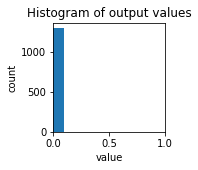

Confusion Matrix:
[[980   0]
 [320   0]]

TP, TN, FP, FN: 0 , 980 , 0 , 320

Classification report:
              precision    recall  f1-score   support

           0       0.75      1.00      0.86       980
           1       0.00      0.00      0.00       320

    accuracy                           0.75      1300
   macro avg       0.38      0.50      0.43      1300
weighted avg       0.57      0.75      0.65      1300



C:\Users\lawrenceh\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [10]:
# experiment 1
(model_output, accuracy) = one_hidden(XX=XX, yy=yy, alpha=1e-1, num_epochs=2000, hiddenWidth=3)

# append experiment parameters/results
alphas.append(1e-1)
num_epochs.append(2000)
hidden_layers.append(1)
hidden_widths.append(3)
accuracys.append(accuracy)

Learning rate: 0.001
Number of epochs: 2000
Number of hidden layers: 1
Hidden layer width: 3

Error after 0 epochs: 0.43567386063673524
Error after 1000 epochs: 0.02532950358279602
Error after 2000 epochs: 0.016605200978746164
Done


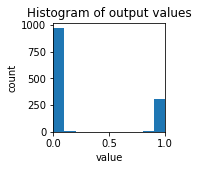

Confusion Matrix:
[[978   2]
 [  2 318]]

TP, TN, FP, FN: 318 , 978 , 2 , 2

Classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       980
           1       0.99      0.99      0.99       320

    accuracy                           1.00      1300
   macro avg       1.00      1.00      1.00      1300
weighted avg       1.00      1.00      1.00      1300



In [11]:
# experiment 2
(model_output, accuracy) = one_hidden(XX=XX, yy=yy, alpha=1e-3, num_epochs=2000, hiddenWidth=3)

# append experiment parameters/results
alphas.append(1e-3)
num_epochs.append(2000)
hidden_layers.append(1)
hidden_widths.append(3)
accuracys.append(accuracy)

Learning rate: 1e-05
Number of epochs: 2000
Number of hidden layers: 1
Hidden layer width: 3

Error after 0 epochs: 0.43567386063673524
Error after 1000 epochs: 0.25673486023588626
Error after 2000 epochs: 0.20315940133535207
Done


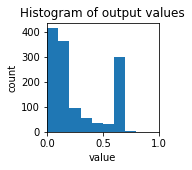

Confusion Matrix:
[[955  25]
 [ 11 309]]

TP, TN, FP, FN: 309 , 955 , 25 , 11

Classification report:
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       980
           1       0.93      0.97      0.94       320

    accuracy                           0.97      1300
   macro avg       0.96      0.97      0.96      1300
weighted avg       0.97      0.97      0.97      1300



In [12]:
# experiment 3
(model_output, accuracy) = one_hidden(XX=XX, yy=yy, alpha=1e-5, num_epochs=2000, hiddenWidth=3)

# append experiment parameters/results
alphas.append(1e-5)
num_epochs.append(2000)
hidden_layers.append(1)
hidden_widths.append(3)
accuracys.append(accuracy)

##### Results:
Of the alphas tested (1e-5, 1e-3, 1e-1), alpha=1e-3 with 2000 epochs, 1 hidden layer, and 3 hidden nodes/layer already gives very high accuracy. Higher and lower alphas were less accurate.

Next, will try increasing number of epochs or hidden layer width

Learning rate: 0.001
Number of epochs: 5000
Number of hidden layers: 1
Hidden layer width: 3

Error after 0 epochs: 0.43567386063673524
Error after 1000 epochs: 0.02532950358279602
Error after 2000 epochs: 0.016605200978746164
Error after 3000 epochs: 0.013476242908850636
Error after 4000 epochs: 0.01183408853558434
Error after 5000 epochs: 0.010777319908681126
Done


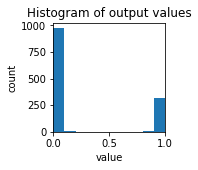

Confusion Matrix:
[[978   2]
 [  2 318]]

TP, TN, FP, FN: 318 , 978 , 2 , 2

Classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       980
           1       0.99      0.99      0.99       320

    accuracy                           1.00      1300
   macro avg       1.00      1.00      1.00      1300
weighted avg       1.00      1.00      1.00      1300



In [13]:
# experiment 4
(model_output, accuracy) = one_hidden(XX=XX, yy=yy, alpha=1e-3, num_epochs=5000, hiddenWidth=3)

# append experiment parameters/results
alphas.append(1e-3)
num_epochs.append(5000)
hidden_layers.append(1)
hidden_widths.append(3)
accuracys.append(accuracy)

Learning rate: 0.001
Number of epochs: 2000
Number of hidden layers: 1
Hidden layer width: 6

Error after 0 epochs: 0.47044132974082936
Error after 1000 epochs: 0.017140417296933146
Error after 2000 epochs: 0.012280021607237944
Done


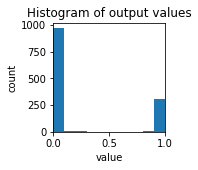

Confusion Matrix:
[[979   1]
 [  2 318]]

TP, TN, FP, FN: 318 , 979 , 1 , 2

Classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       980
           1       1.00      0.99      1.00       320

    accuracy                           1.00      1300
   macro avg       1.00      1.00      1.00      1300
weighted avg       1.00      1.00      1.00      1300



In [14]:
# experiment 5
(model_output, accuracy) = one_hidden(XX=XX, yy=yy, alpha=1e-3, num_epochs=2000, hiddenWidth=6)

# append experiment parameters/results
alphas.append(1e-3)
num_epochs.append(2000)
hidden_layers.append(1)
hidden_widths.append(6)
accuracys.append(accuracy)

##### Results:
From experiment 2, alpha=1e-3 with 2000 epochs, 1 hidden layer, and 3 hidden nodes/layer already gives very high accuracy.
While increasing to 5000 epochs (experiment 5) decreased training error, there was no further increase in accuracy (and too many iterations could lead to overfitting). However, changing the hidden layer width to 6 (while keeping number of epochs at 2000; experiment 6) further increased accuracy.

Next, will try using chaging the hidden layer depth, using 2 hidden layers

Learning rate: 0.001
Number of epochs: 2000
Number of hidden layers: 2
Hidden layer width: 6

Error after 0 epochs: 0.604378049818006
Error after 1000 epochs: 0.016476854155629907
Error after 2000 epochs: 0.011903655955726048
Done


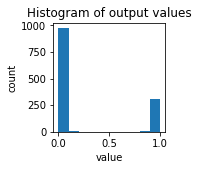

Confusion Matrix:
[[979   1]
 [  2 318]]

TP, TN, FP, FN: 318 , 979 , 1 , 2

Classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       980
           1       1.00      0.99      1.00       320

    accuracy                           1.00      1300
   macro avg       1.00      1.00      1.00      1300
weighted avg       1.00      1.00      1.00      1300



In [15]:
# experiment 6
(model_output, accuracy) = two_hidden(XX=XX, yy=yy, alpha=1e-3, num_epochs=2000, hiddenWidth=6)

# append experiment parameters/results
alphas.append(1e-3)
num_epochs.append(2000)
hidden_layers.append(2)
hidden_widths.append(6)
accuracys.append(accuracy)

Learning rate: 0.001
Number of epochs: 2000
Number of hidden layers: 2
Hidden layer width: 12

Error after 0 epochs: 0.40420878787215964
Error after 1000 epochs: 0.012552610870623114
Error after 2000 epochs: 0.008645183423881573
Done


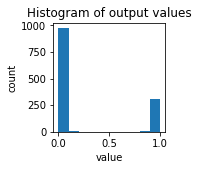

Confusion Matrix:
[[979   1]
 [  2 318]]

TP, TN, FP, FN: 318 , 979 , 1 , 2

Classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       980
           1       1.00      0.99      1.00       320

    accuracy                           1.00      1300
   macro avg       1.00      1.00      1.00      1300
weighted avg       1.00      1.00      1.00      1300



In [16]:
# experiment 7
(model_output, accuracy) = two_hidden(XX=XX, yy=yy, alpha=1e-3, num_epochs=2000, hiddenWidth=12)

# append experiment parameters/results
alphas.append(1e-3)
num_epochs.append(2000)
hidden_layers.append(2)
hidden_widths.append(12)
accuracys.append(accuracy)

##### Results:
From experiment 5, alpha=1e-3 with 2000 epochs, 1 hidden layer, and 6 hidden nodes gave the best accuracy thus far.
Increasing the depth to 2 hidden layers (experiment 6) decreased training error, and subsequently increasing the hidden layer width to 12 (experiment 7) further decreased training error. However, neither further increased accuracy, and the additional hidden layer may lead to overfitting (even more than already is).

##### Experiment summary

In [17]:
# get experiment summary
expts = {'alphas':alphas, 'num_epochs':num_epochs, 'hidden_layer':hidden_layers, 'hidden_width':hidden_widths, 'accuracy':accuracys}
pd.DataFrame(expts, index=range(1,len(alphas)+1))

,alphas,num_epochs,hidden_layer,hidden_width,accuracy
1,0.10000,2000,1,3,0.753846
2,0.00100,2000,1,3,0.996923
3,0.00001,2000,1,3,0.972308
4,0.00100,5000,1,3,0.996923
5,0.00100,2000,1,6,0.997692
6,0.00100,2000,2,6,0.997692
7,0.00100,2000,2,12,0.997692


##### 4. Determine what the best neural network structure and hyperparameter settings results in the best predictive capability
Of the model parameters tested, (alpha=1e-3, num_epochs=2000, hidden layer=1, hidden width=6) provided the best accuracy/predictive capability on the test set and was the most parsimonious.

For results from individual experiments please see above section.